In [2]:
%%bash
wget https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

--2023-05-07 20:09:10--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘marks.txt’

     0K ...                                                   100% 32.2M=0s

2023-05-07 20:09:10 (32.2 MB/s) - ‘marks.txt’ saved [3775/3775]



In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn

In [4]:
data = pd.read_csv('marks.txt', header=None)
# you must signify to read_csv that there is no headers available
data.columns = ['exam 1', 'exam 2', 'admission']
# then make your own headers

<Axes: xlabel='exam 1', ylabel='exam 2'>

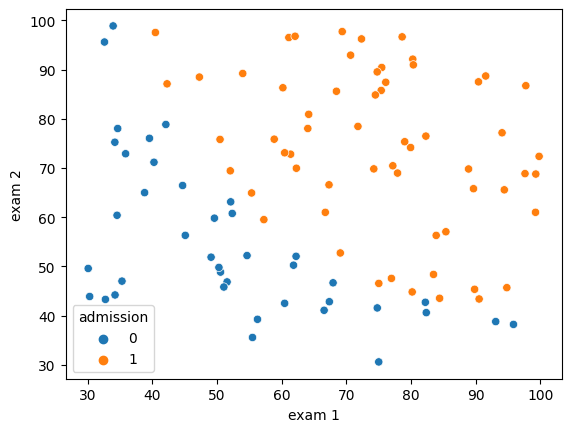

In [5]:
X = data[['exam 1', 'exam 2']]
y = data['admission']
sbn.scatterplot(x = 'exam 1', y = 'exam 2', hue = 'admission', data = data)

In [12]:
# our macihne learning code
X = data[['exam 1', 'exam 2']]
X = X/100
N = len(X)
print(N)
ones = np.ones(N)
Xp = np.c_[ones,X]
y = data['admission']

np.random.seed(0)
# makes error same every time
w = 2 * np.random.rand(3) - 1
# number inside rand should be total number of x including x0 (so x0 x1 x2 = 3)

epochs = 100000
learning_rate = 0.1
for epoch in range(epochs):
  X_hidden = w @ Xp.T
  y_predicted = 1/(1 + np.exp(-X_hidden))
  error = y - y_predicted
  L2 = 0.5*np.mean(error**2)

  gradient = -(1/N) * (error * y_predicted * (1-y_predicted)) @ Xp
  w = w - learning_rate * gradient
  
  if epoch%(epochs/10) == 0:
    print(epoch,L2)

print(w)

100
0 0.11282901180939155
10000 0.057843482898046666
20000 0.04744635894711207
30000 0.043089356669744235
40000 0.04063819893443714
50000 0.03904963331699037
60000 0.03793117959528953
70000 0.03709960851209997
80000 0.036456949372749986
90000 0.03594569251539734
[-12.80830291  10.89001023  10.01155613]


In [15]:
data['y_predicted'] = y_predicted
data['abs error'] = abs(error)
data.loc[data['abs error'] > 0.5]


,exam 1,exam 2,admission,y_predicted,abs error
10,95.861555,38.225278,0,0.811222,0.811222
16,69.070144,52.740470,1,0.498396,0.501604
27,93.114389,38.800670,0,0.771431,0.771431
33,52.045405,69.432860,1,0.452830,0.547170
36,33.915500,98.869436,0,0.686426,0.686426
43,82.368754,40.618255,0,0.556799,0.556799
57,32.577200,95.598548,0,0.576948,0.576948
79,82.226662,42.719879,0,0.604228,0.604228
83,57.238706,59.514282,1,0.350534,0.649466
98,55.340018,64.931938,1,0.430191,0.569809


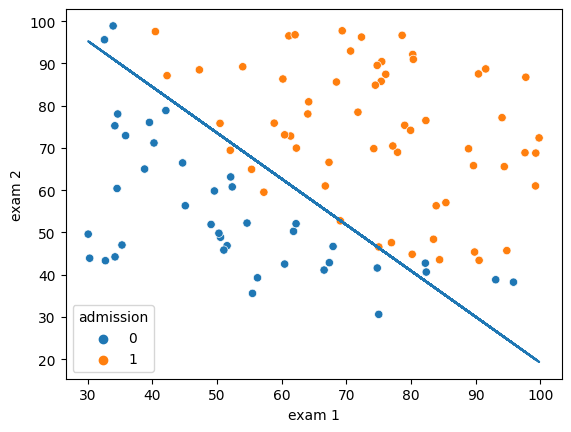

In [19]:
sbn.scatterplot(x = 'exam 1', y = 'exam 2', hue = 'admission', data = data)
decision_boundary = -(w[0] + w[1]/100*data['exam 1'])/(w[2]/100)
plt.plot(data['exam 1'],decision_boundary)